In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from astropy.io import fits
filename = '/gpfswork/rech/xdy/commun/nfw_samples/65_130_.5_3e14_1/0.148/samples_0.148_'
samples148 = fits.getdata(filename+'1.fits')

for i in range(2,41):
    if (i != 34) and (i != 36) and (i != 38) and (i != 39) :
        s = fits.getdata(filename+str(i)+'.fits')
        #samples01 = np.concatenate([samples01, s], axis=1)
        samples148 = np.concatenate([samples148, s], axis=1)

print(samples148.shape)

(3, 324, 129600)


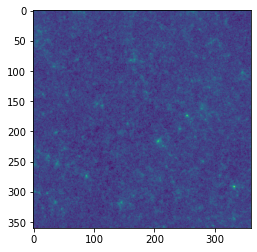

In [8]:
imshow(samples148[2,10,...].reshape(360,360))

In [9]:
img = samples148[-1,...].reshape(-1,360,360)

In [10]:
x=65
y=130

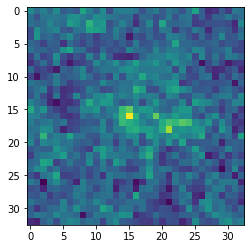

In [18]:
w = 16
ind = 4
imshow(img[ind,:][x-w:x+w+1, y-w:y+w+1])

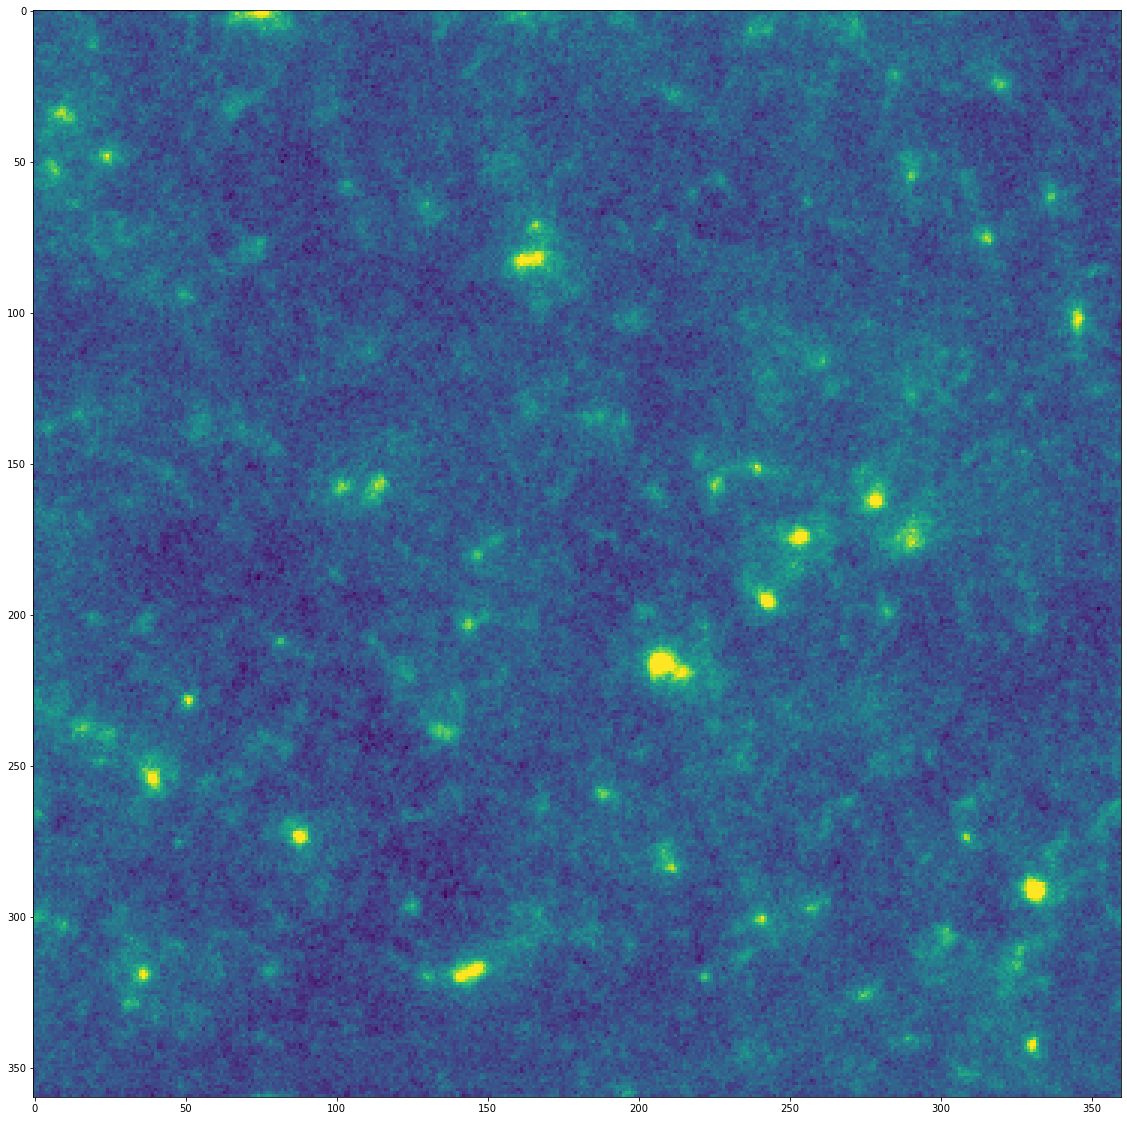

In [24]:
figure(figsize=[20,20])
imshow(img.mean(axis=0),vmax=0.15)

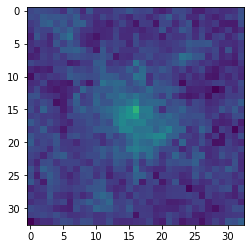

In [26]:
imshow(img[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0),vmax=0.15)

In [33]:
filename = '/gpfswork/rech/xdy/commun/nfw_samples/background/samples_no_cluster_0.148_'
samplesback = fits.getdata(filename+'1.fits')

for i in range(2,10):
    if (i != 34) and (i != 36) and (i != 38) and (i != 39) :
        s = fits.getdata(filename+str(i)+'.fits')
        #samples01 = np.concatenate([samples01, s], axis=1)
        samplesback = np.concatenate([samplesback, s], axis=1)

print(samplesback.shape)

(3, 27, 129600)


In [34]:
img_background = samplesback[-1,...].reshape(-1,360,360)

Text(0.5, 1.0, 'mean cluster')

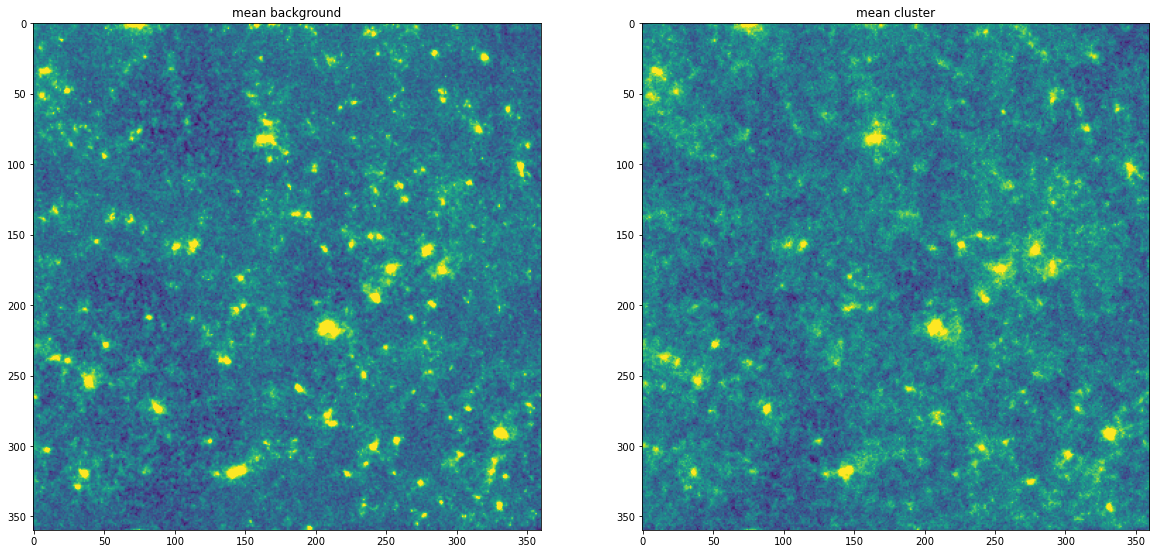

In [47]:
figure(figsize=[20,10])
subplot(121)
imshow(img_background.mean(axis=0),vmax=0.1)
title('mean background')
subplot(122)
imshow(img[:27].mean(axis=0),vmax=0.1)
title('mean cluster')

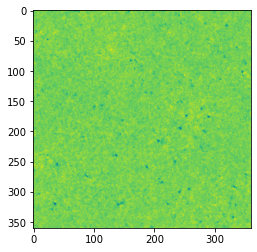

In [41]:
imshow(img[:27].mean(axis=0) - img_background.mean(axis=0))

Text(0.5, 1.0, 'mean background')

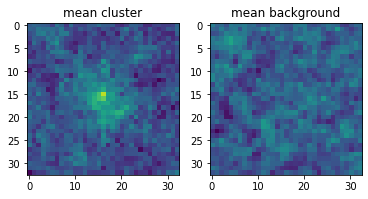

In [45]:
subplot(121)
imshow(img[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0),vmax=0.1)
title('mean cluster')
subplot(122)
imshow(img_background[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0),vmax=0.1)
title('mean background')

In [48]:
import lenspack

In [60]:
radius = linspace(0,16, 16)

In [109]:
lenspack.image.filters.aperture_mass?

In [113]:
# filter : {'s98', 'vw98', 'jbj04', 'starlet'}
filter='jbj04'

In [114]:
res = [lenspack.image.filters.aperture_mass(img[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0), i, filter=filter ) for i in radius]
res = np.stack(res,axis=0)

In [115]:
resb = [lenspack.image.filters.aperture_mass(img_background[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0), i, filter=filter) for i in radius]
resb = np.stack(resb,axis=0)

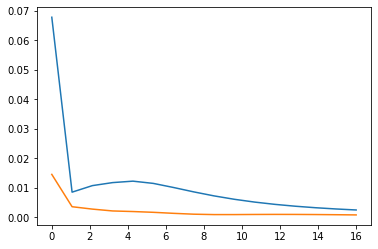

In [116]:
plot(radius, res[:,16,16])
plot(radius, resb.reshape([16,-1]).std(axis=1))

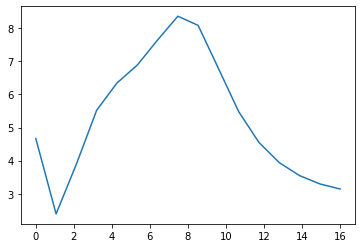

In [117]:
plot(radius, res[:,16,16]/resb.reshape([16,-1]).std(axis=1))

In [185]:
std = resb.reshape([16,-1]).std(axis=1)[6]
rad = radius[6]
rad, std

(6.4, 0.001319467068712173)

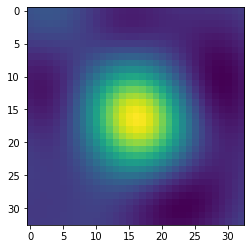

In [186]:
imshow(lenspack.image.filters.aperture_mass(img[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0), rad, filter=filter))

In [187]:
filtered_img = [lenspack.image.filters.aperture_mass(img[i,x-w:x+w+1, y-w:y+w+1], rad, filter=filter) for i in range(len(img))]

In [188]:
filtered_back = [lenspack.image.filters.aperture_mass(img_background[i,x-w:x+w+1, y-w:y+w+1], rad, filter=filter) for i in range(len(img_background))]

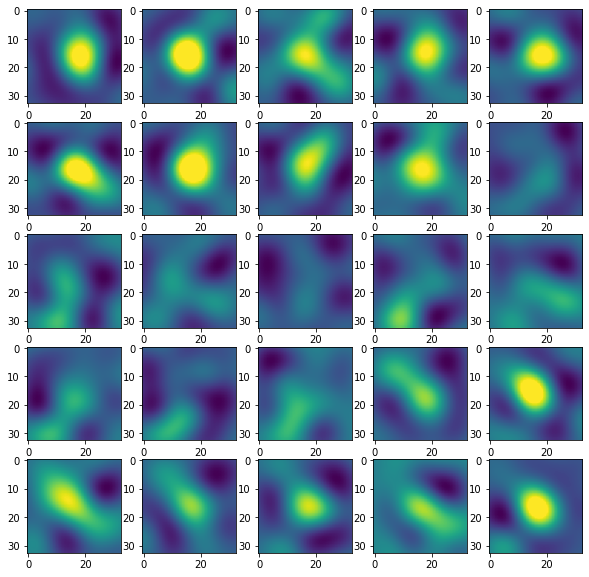

In [189]:
figure(figsize=[10,10])
for i in range(25):
    subplot(5,5,i+1)
    imshow(filtered_img[i]/std,vmax=10)

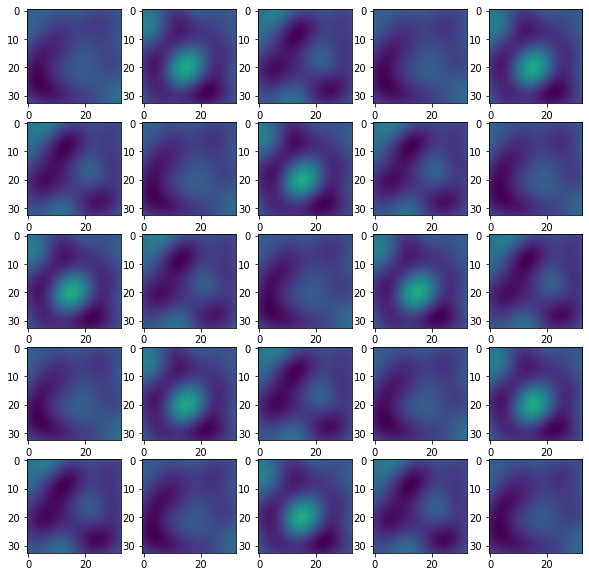

In [190]:
figure(figsize=[10,10])
for i in range(25):
    subplot(5,5,i+1)
    imshow(filtered_back[i]/std,vmax=10)

In [191]:
filtered_img = np.stack(filtered_img,axis=0)

In [192]:
filtered_back = np.stack(filtered_back,axis=0)

In [193]:
filtered_img.shape, filtered_back.shape

((324, 33, 33), (27, 33, 33))

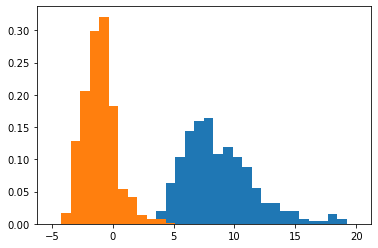

In [194]:
hist(filtered_img.reshape([324, -1]).max(axis=1)/std, 32, range=[-5,20],density=True);
hist(filtered_back.flatten()/std, 32, range=[-5,20],density=True);

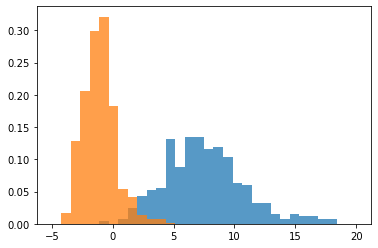

In [196]:
hist(filtered_img[:, 16,16]/std, 32, range=[-5,20],density=True,alpha=0.75,label='background');
hist(filtered_back.flatten()/std, 32, range=[-5,20],density=True,alpha=0.75,label='cluster center');

In [197]:
# ok, so let's pick a detection threshold around 5 sigma

In [198]:
det = filtered_img[:, 16,16]/std > 5.
non_det = filtered_img[:, 16,16]/std < 5.

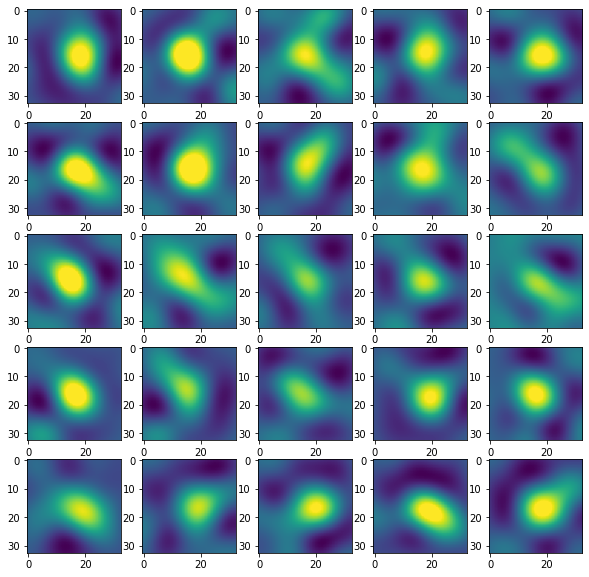

In [199]:
figure(figsize=[10,10])
for i in range(25):
    subplot(5,5,i+1)
    imshow(filtered_img[det][i]/std,vmax=10)

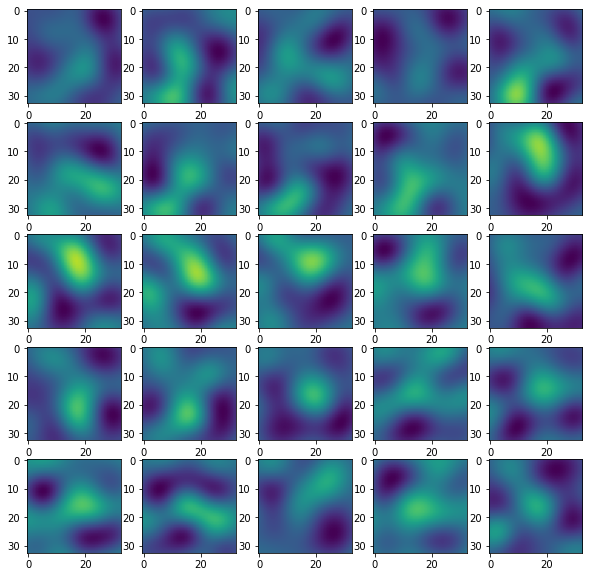

In [200]:
figure(figsize=[10,10])
for i in range(25):
    subplot(5,5,i+1)
    imshow(filtered_img[non_det][i]/std,vmax=10)

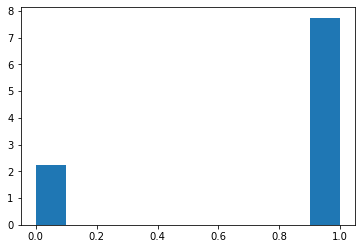

In [203]:
hist(det*1., density=True);

In [206]:
where(det)[0].shape[0]/len(det)

0.7746913580246914

In [ ]:
# With this setting, we detect the cluster at 5 sigma confidence around 77% of the time